# Churn Analysis - Waze App

## Step 02 - Exploratory Data Analysis (EDA)

This Notebook performs **Exploratory Data Analysis (EDA)** and is structured into four main steps:

1. Imports and Loading the data
2. Data exploration and Data cleaning
3. Data Visualization
4. Evaluating and sharing results

### 1. Data imports and data loading

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('waze_dataset.csv')

### 2. Data exploration and data cleaning

#### Data Overview

In [ ]:
print(df.head(10))
print()
print(df.size)
print()
print(df.describe())
print()
print(df.info())

   ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   
5   5  retained       113     103      279.544437                     2637   
6   6  retained         3       2      236.725314                      360   
7   7  retained        39      35      176.072845                     2999   
8   8  retained        57      46      183.532018                      424   
9   9   churned        84      68      244.802115                     2997   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   

#### Data Assesment & Cleaning Strategy

Before diving into deeper analysis, we need to ensure that our dataset is **clean, structured and relevant**. <br>
A well prepared dataset leads to more accurate insights and better decision-making. <br>
The following steps help us to achieve that
(**We will go into each of these steps in more detail in the various notebooks.**):

1. **Feature Selection** - Identifying Valuable Data
  - Determine which column provide useful information and which are redundant
  - Remove irrelevant columns to improve efficiency
  - Cleaner Data improve model performance and make visualizations more meaningful

2. **Handling Missing Data** - Ensuring Data Completeness
  - drop rows/columns if missing data is excessive*
  - fill missing values using mean/median/mode

  *If the missing data are missing completly at random, meaning that the reason is independent of the data values themselves, we can proceed with a complete-case analysis by removing the rows with missing values. Otherwise, we need to investigate the root cause of the missingness and make sure it won't interfere with the statistical inference and modeling.

3. **Detecting and handling Outliers** - Improving Data Quality
  - use **boxplots, histograms or IQR/Z-score methods** to detect and visualize the distribution of the data
  - three options for dealing with outliers: delete, reassign or leave

4. **Data Consitency & Formatting** - Standardizing the Dataset
  - Ensure correct datatypes (datetime, categorical, numeric)
  - standardize text fields (e.g. country names, product categories)

5. **Feature Engineering** - Enhancing Insights
  - Normalize or scale numerical features when needed (for machine learning models)


### 3. Data Visualizations

#### 3.1 Univariate Column Visualization

First, we create visualizations for each column in the dataset. This helps to quickly detect patterns, distributions and potential issues that might be overlooked in raw numerical data.

##### sessions

The number of occurences of a user opening the app during the month

Text(0.5, 1.0, 'sessions box plot')

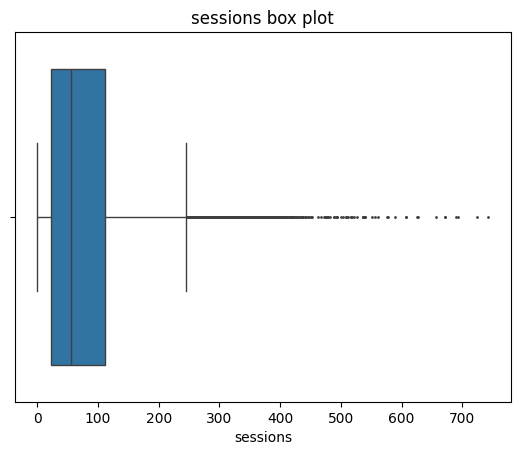

In [ ]:
# Box plot
sns.boxplot(x = df['sessions'], fliersize=1)
plt.title('sessions box plot')

Text(0.5, 1.0, 'sessions box plot')

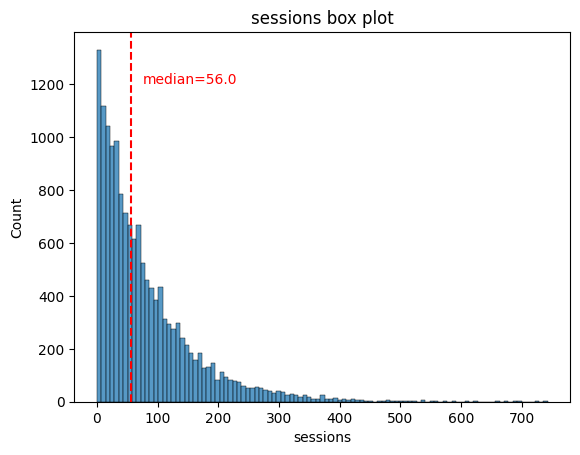

In [ ]:
# Histogram
sns.histplot(x=df['sessions'])
median = df['sessions'].median()

plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions box plot')

##### drives

An occurance of driving at least 1km during the month

Text(0.5, 1.0, 'drives box plot')

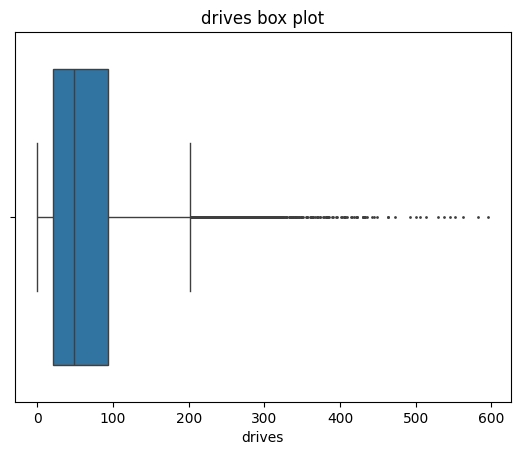

In [ ]:
# Box plot
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives box plot')

In [ ]:
#function to create histograms
def histogrammer(column_str, median_text=True, **kwargs):

    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)
    plt.axvline(median, color='red', linestyle='--')
    if median_text==True:
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

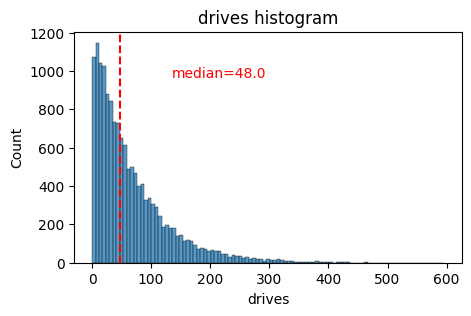

In [ ]:
histogrammer('drives')

##### total sessions

A model estimate of the total number of sessions since a user has onboarded.

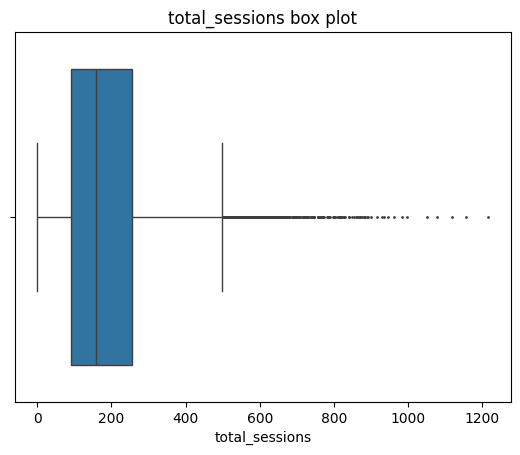

In [ ]:
# Box plot
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

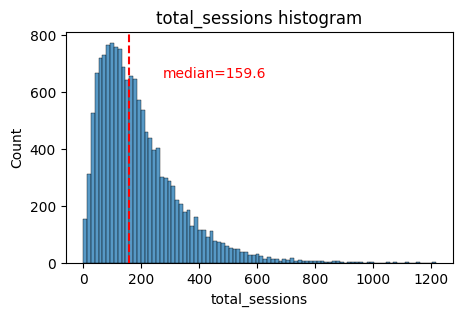

In [ ]:
histogrammer('total_sessions')

##### n_days_after_onboarding

The number of days a user signed up for the app.

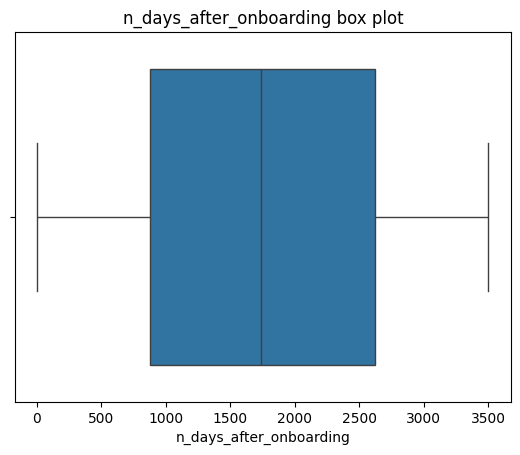

In [ ]:
# Box plot
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot');

Median: 1741.0


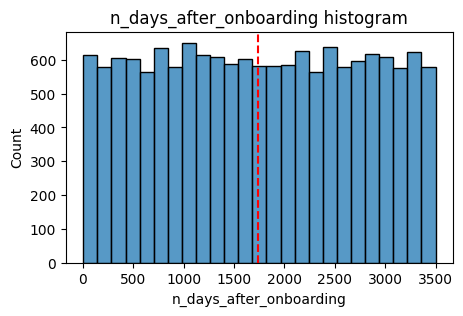

In [ ]:
# Histogram
histogrammer('n_days_after_onboarding', median_text=False)

##### driven_km_drives

Total km driven during the month

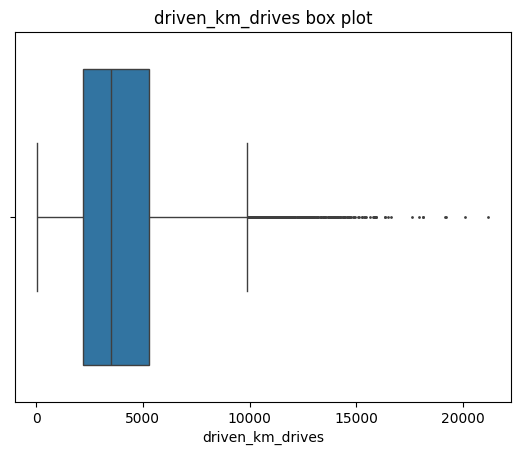

In [ ]:
# Box plot
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');

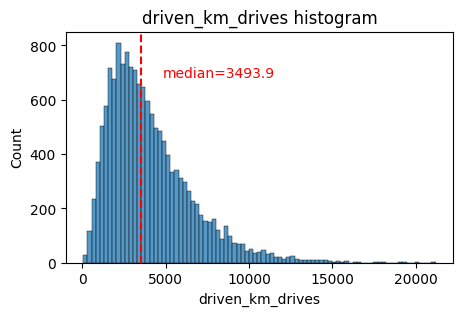

In [ ]:
# Histogram
histogrammer('driven_km_drives')

##### duration_minutes_drives

Total duration driven in minutes during the month.

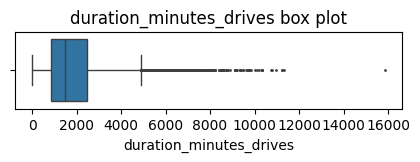

In [ ]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

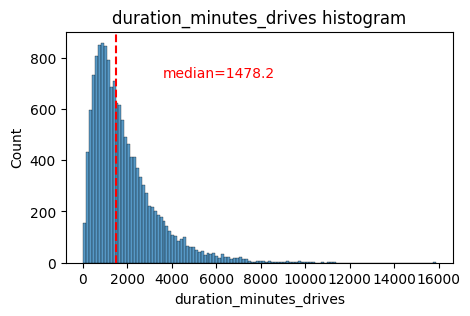

In [ ]:
# Histogram
histogrammer('duration_minutes_drives')

##### activity_days

Number of days the user opens the app during the month

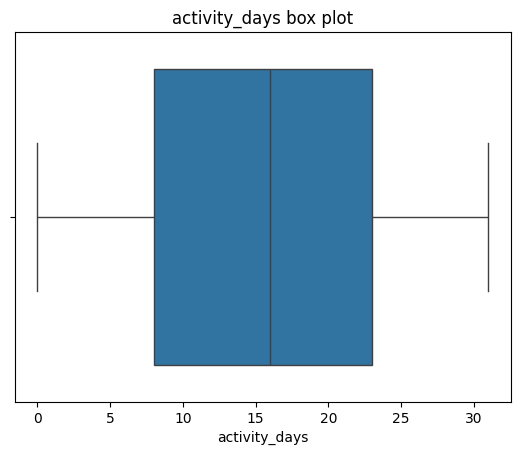

In [ ]:
# Box plot
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days box plot');

Median: 16.0


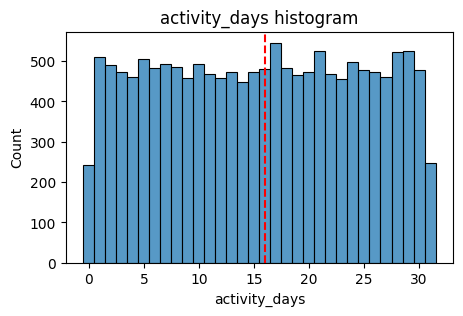

In [ ]:
# Histogram
histogrammer('activity_days', median_text=False, discrete=True)

##### driving_days

Number of days the user drives (at least 1km) during the month.

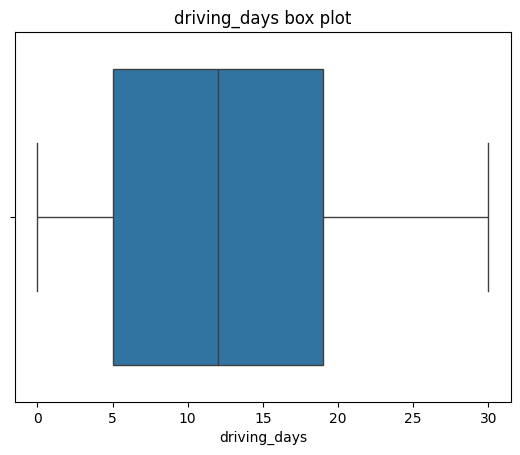

In [ ]:
# Box plot
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot');

Median: 12.0


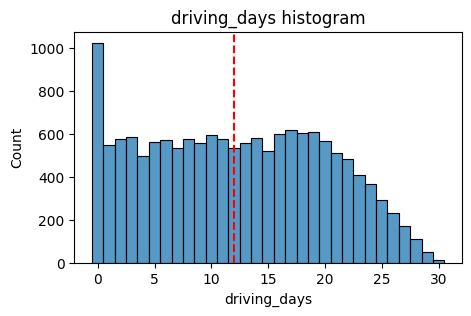

In [ ]:
# Histogram
histogrammer('driving_days', median_text=False, discrete=True)

##### device

The type of device a user starts a session with

This is a categorical variable, so you don't plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

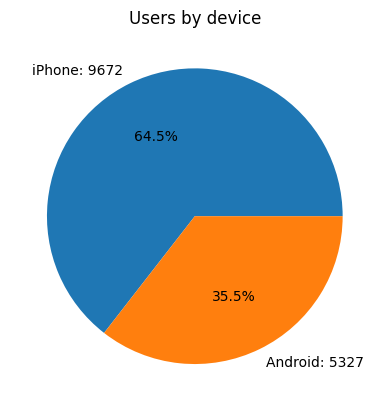

In [ ]:
# Pie chart
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

##### label

Target variable ("retained vs. churned") for if a user has churned anytime during the course of the month.

This is also a categorical variable and as such would not be ploted as a box plot. We plot a pie chart instead.

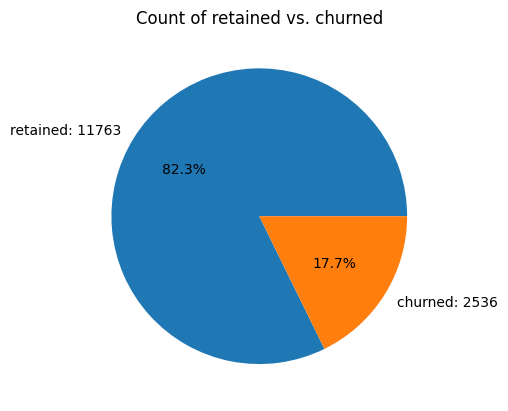

In [ ]:
# Pie chart
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

#### 3.2 Multivariate Visualization

Next, we explore relationships between variables using bivariate and multivariate visualizations. Understanding how variables interact is crucial for uncovering deeper patterns. By comparing numerical and categorical features, we can identify correlations, detect trends, and assess whether certain variables are redundant or highly dependent on each other.

##### driving_days vs. activity_days

Because both 'driving_days' and 'activity_days' represent counts of days over a month and they're also closely related, we can plot them together on a single histogram.

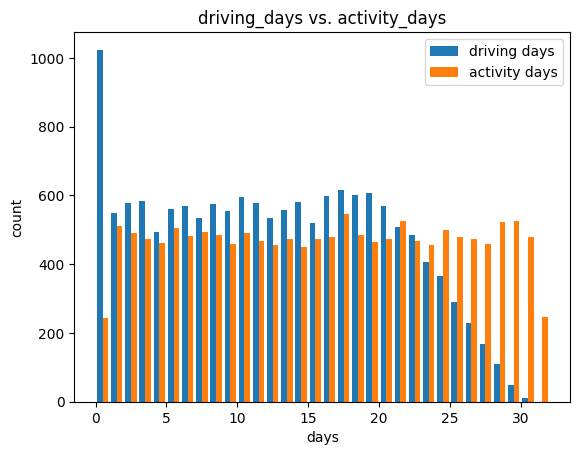

In [ ]:
# Histogram
plt.hist([df['driving_days'], df['activity_days']], bins=range(0,33), label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

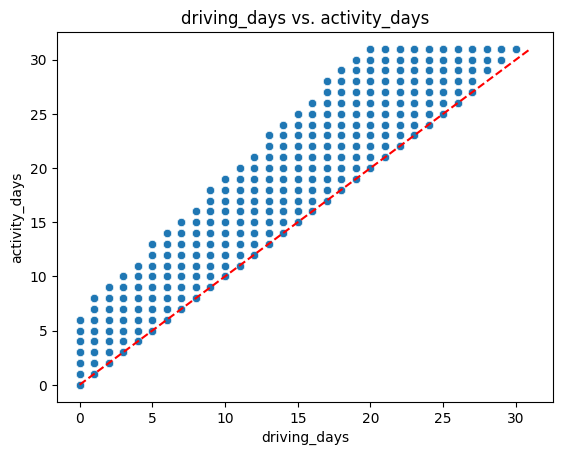

In [ ]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

##### Retention by device

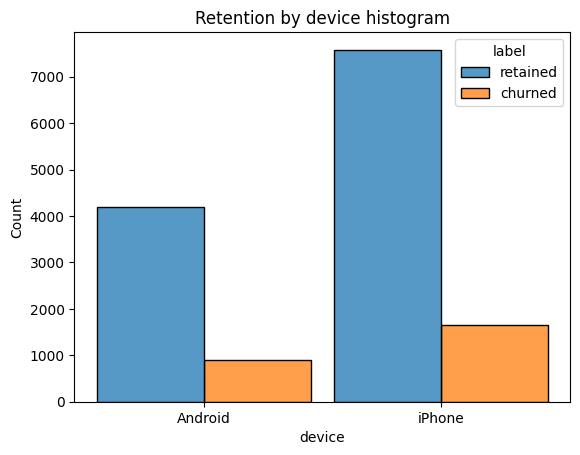

In [ ]:
# Histogram
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

##### Churn rate per number of driving days

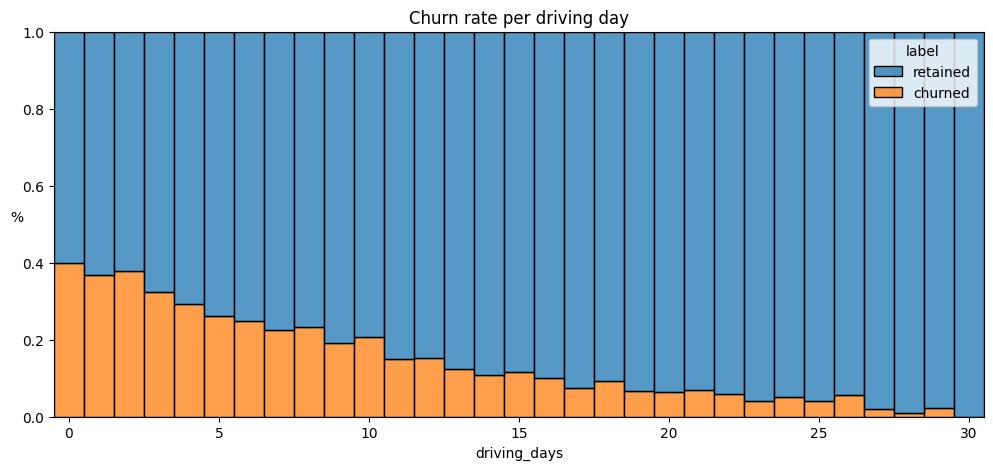

In [ ]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

### 4. Results and evaluation

##### Types of distributions

Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.

##### Churned vs. Retained

Less than 18% of users churned, and \~82% were retained.

Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.


##### Outliers

Several variables had highly improbable or perhaps even impossible outlying values, such as 'driven_km_drives'. Some of the monthly variables also might be problematic, such as 'activity_days' and 'driving_days', because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.